In [57]:
import pandas as pd
import numpy as np


In [58]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [59]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [61]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
outcome,0


In [62]:

for column in ['Glucose', 'BloodPressure', 'Insulin', 'BMI']:
       df[column] = df[column].replace(0, np.nan)
       median_value = df[column].median()
       df[column] = df[column].fillna(median_value)

In [63]:
X=df.drop(columns=['SkinThickness','outcome'],axis=1)
X

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,125.0,33.6,0.627,50
1,1,85.0,66.0,125.0,26.6,0.351,31
2,8,183.0,64.0,125.0,23.3,0.672,32
3,1,89.0,66.0,94.0,28.1,0.167,21
4,0,137.0,40.0,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,10,101.0,76.0,180.0,32.9,0.171,63
764,2,122.0,70.0,125.0,36.8,0.340,27
765,5,121.0,72.0,112.0,26.2,0.245,30
766,1,126.0,60.0,125.0,30.1,0.349,47


In [64]:
for column in df.columns:
    count_zeros = (df[column] == 0).sum()
    print(f"Number of 0s in column '{column}': {count_zeros}")

Number of 0s in column 'Pregnancies': 111
Number of 0s in column 'Glucose': 0
Number of 0s in column 'BloodPressure': 0
Number of 0s in column 'SkinThickness': 227
Number of 0s in column 'Insulin': 0
Number of 0s in column 'BMI': 0
Number of 0s in column 'DiabetesPedigreeFunction': 0
Number of 0s in column 'Age': 0
Number of 0s in column 'outcome': 500


In [65]:
Y=df['outcome']

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

DecisionTreeClassifier()

In [68]:
X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.3,random_state=45)

In [69]:
model=LogisticRegression()
model.fit(X_train,Y_train)
new_data = [[6, 148.0, 72.0, 125.0, 33.6, 0.62, 50]]
new_data_df = pd.DataFrame(new_data, columns=X.columns)
prediction = model.predict(new_data_df)
print(prediction)

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [71]:
Y_pred = model.predict(X_test)
accuracy=accuracy_score(Y_test,Y_pred)
print(accuracy)

0.7616387337057728


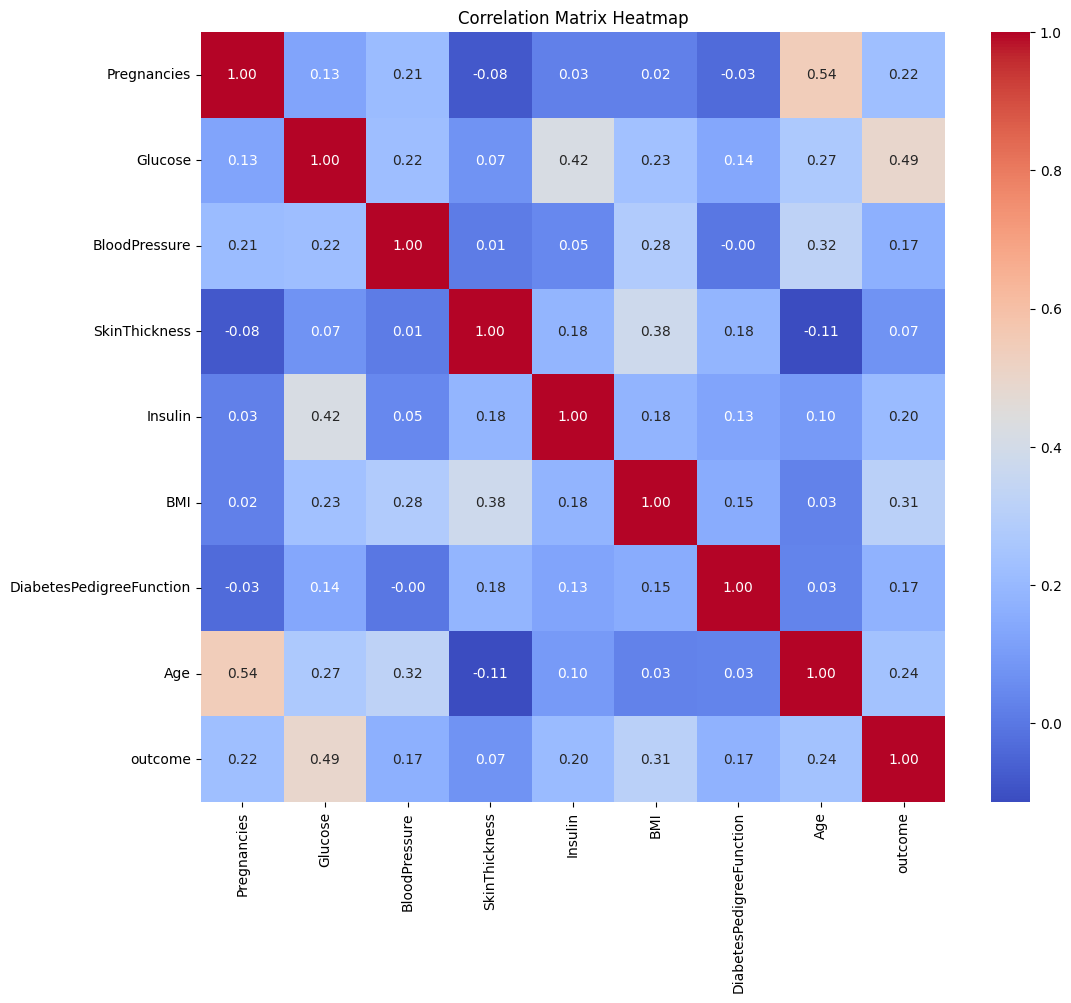

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [73]:
report=classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.77      0.89      0.83       346
           1       0.73      0.52      0.61       191

    accuracy                           0.76       537
   macro avg       0.75      0.71      0.72       537
weighted avg       0.76      0.76      0.75       537



In [74]:
matrix=confusion_matrix(Y_test,Y_pred)
print(matrix)

[[309  37]
 [ 91 100]]
